In [46]:
# 第一个代码块：导入必要的库
import requests
import json
from typing import Dict, List

# API基础URL
BASE_URL = "http://localhost:8000"

In [97]:
def test_single_sms():
    url = f"{BASE_URL}/api/v1/check"
    
    # 测试用例1: 正常的物流通知
    data1 = {
        "signature": "天猫买药",
        "content": "【天猫买药】今晚8点开门红！米诺CP控油蓬松洗发水，限时超值换购49元生发液>jk.tb.cn/e.aba 询天猫客服，谨防诈骗拒收请回复R",
        "business_type": "会销-普通",
        "account_type": "渠道"
    }
        
    test_cases = [data1]
    
    print("=== 单条短信审核测试 ===")
    for i, data in enumerate(test_cases, 1):
        print(f"\n测试用例 {i}:")
        print(f"请求数据: {json.dumps(data, ensure_ascii=False, indent=2)}")
        
        try:
            response = requests.post(url, json=data)
            print(f"状态码: {response.status_code}")
            print(f"响应数据: {json.dumps(response.json(), ensure_ascii=False, indent=2)}")
        except Exception as e:
            print(f"请求失败: {str(e)}")
test_single_sms()

=== 单条短信审核测试 ===

测试用例 1:
请求数据: {
  "signature": "天猫买药",
  "content": "【天猫买药】今晚8点开门红！米诺CP控油蓬松洗发水，限时换购49元生发液>jk.tb.cn/e.aba 询天猫客服，谨防诈骗拒收请回复R",
  "business_type": "会销-普通",
  "account_type": "渠道"
}
状态码: 200
响应数据: {
  "passed": true,
  "status": "通过",
  "business_reason": "审核通过 (原因: 基础分: 100, 最终得分: 82.00)",
  "score": 82.0
}


In [ ]:
def test_single_sms():
    url = f"{BASE_URL}/api/v1/check"
    
    # 测试用例1: 正常的物流通知
    data1 = {
        "signature": "顺丰速运",
        "content": "您的快递已到达配送点，请及时取件。",
        "business_type": "行业-物流",
        "account_type": "直客"
    }
    
    # 测试用例2: 包含营销内容的通知
    data2 = {
        "signature": "某商城",
        "content": "优惠活动进行中，点击链接领取红包 http://example.com",
        "business_type": "行业-通知",
        "account_type": "渠道"
    }
    
    # 测试用例3: 会销类短信
    data3 = {
        "signature": "某公司",
        "content": "尊敬的会员，您有一份专属优惠券待领取，限时有效。",
        "business_type": "会销-普通",
        "account_type": "直客"
    }
    
    test_cases = [data1, data2, data3]
    
    print("=== 单条短信审核测试 ===")
    for i, data in enumerate(test_cases, 1):
        print(f"\n测试用例 {i}:")
        print(f"请求数据: {json.dumps(data, ensure_ascii=False, indent=2)}")
        
        try:
            response = requests.post(url, json=data)
            print(f"状态码: {response.status_code}")
            print(f"响应数据: {json.dumps(response.json(), ensure_ascii=False, indent=2)}")
        except Exception as e:
            print(f"请求失败: {str(e)}")
test_single_sms()

In [15]:
# 第六个代码块：测试API根路径
def test_root():
    url = f"{BASE_URL}/"
    print("=== API根路径测试 ===")
    
    try:
        response = requests.get(url)
        print(f"状态码: {response.status_code}")
        print(f"响应数据: {json.dumps(response.json(), ensure_ascii=False, indent=2)}")
    except Exception as e:
        print(f"请求失败: {str(e)}")

# 运行测试
test_root()

=== API根路径测试 ===
状态码: 200
响应数据: {
  "message": "欢迎使用短信审核 API 服务"
}


In [37]:
import pandas as pd

def test_excel_batch():
    try:
        df = pd.read_excel('合并审核.xlsx')
        
        print("=== Excel批量数据测试 ===")
        print(f"读取到 {len(df)} 条测试数据")
        
        # 构建批量请求数据
        sms_list = []
        for _, row in df.iterrows():
            sms_list.append({
                "signature": str(row['短信签名']),
                "content": str(row['短信内容']),
                "business_type": str(row['客户业务类型']),
                "account_type": str(row['客户类型'])
            })
        
        data = {"sms_list": sms_list}
        print(f"请求数据: {json.dumps(data, ensure_ascii=False, indent=2)}")
        
        try:
            response = requests.post(f"{BASE_URL}/api/v1/batch-check", json=data)
            print(f"状态码: {response.status_code}")
            print(f"响应数据: {json.dumps(response.json(), ensure_ascii=False, indent=2)}")
        except Exception as e:
            print(f"请求失败: {str(e)}")
            
    except Exception as e:
        print(f"读取Excel文件失败: {str(e)}")
        print("请确保Excel文件存在且格式正确")

# 运行批量测试
test_excel_batch()

=== Excel批量数据测试 ===
读取到 10954 条测试数据
请求数据: {
  "sms_list": [
    {
      "signature": "聚鲨环球精选",
      "content": "【聚鲨环球精选】蛇来运转！送您200元专属红包！全家一起享好礼→wp.sharkshopping.com 小鲨祝您蛇年大吉！拒收请回复R",
      "business_type": "会销-普通",
      "account_type": "云平台"
    },
    {
      "signature": "香蜜闺秀",
      "content": "【香蜜闺秀】生日快乐~2月到店免费领棉柔巾1包，还有10元无门槛文胸券！新品文胸买1送1！领>i.smdx.net/wfzmj 拒收请回复R",
      "business_type": "会销-普通",
      "account_type": "云平台"
    },
    {
      "signature": "领克",
      "content": "【领克】Hi，亲爱的Co客，您有20Co积分将于2025年3月1日0时过期，请到领克App尽快使用",
      "business_type": "行业-通知",
      "account_type": "云平台"
    },
    {
      "signature": "苏宁易购",
      "content": "【苏宁易购】联合美的空调给您拜年！买美的无风感空调，享十免安装服务。到店领国补至高可减50%！咨询18655386568 拒收请回复R",
      "business_type": "会销-普通",
      "account_type": "渠道"
    },
    {
      "signature": "360借",
      "content": "【360借】请尽快处理兑现186652.6元预转汇款\n2月1日18点前有效\n点 n0p.cn/U9CIWd 确认提现\n拒收请回复R",
      "business_type": "拉新-网贷",
      "account_type": "渠道"
    },
    {
      "si

/var/folders/g5/7ywkrjs52mn6f4r8ws5jsw8c0000gn/T/ipykernel_57714/1332221648.py:73: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from current font.
  plt.tight_layout()
/var/folders/g5/7ywkrjs52mn6f4r8ws5jsw8c0000gn/T/ipykernel_57714/1332221648.py:73: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
/var/folders/g5/7ywkrjs52mn6f4r8ws5jsw8c0000gn/T/ipykernel_57714/1332221648.py:73: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  plt.tight_layout()
/var/folders/g5/7ywkrjs52mn6f4r8ws5jsw8c0000gn/T/ipykernel_57714/1332221648.py:73: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  plt.tight_layout()
/var/folders/g5/7ywkrjs52mn6f4r8ws5jsw8c0000gn/T/ipykernel_57714/1332221648.py:73: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/var/folders/g5/7ywkrjs52mn6f4r8ws5jsw8c0000gn/T/ipyker

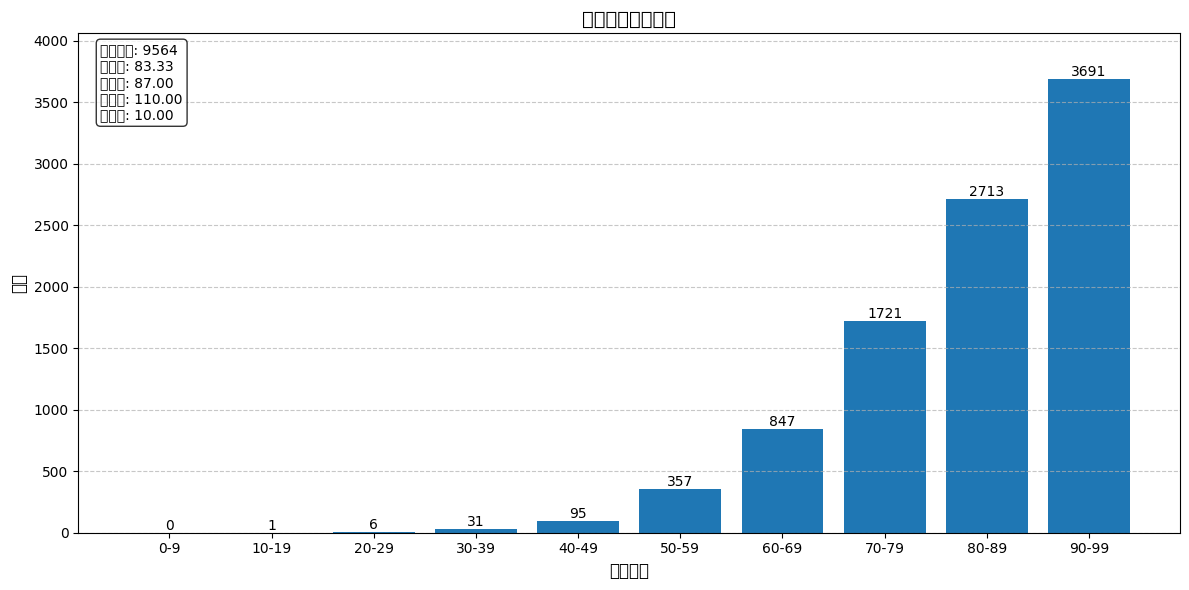


=== 详细统计信息 ===
总样本数: 9564
平均分: 83.33
中位数: 87.00
最高分: 110.00
最低分: 10.00

分数分布:
0-9分: 0条
10-19分: 1条
20-29分: 6条
30-39分: 31条
40-49分: 95条
50-59分: 357条
60-69分: 847条
70-79分: 1721条
80-89分: 2713条
90-99分: 3691条


In [36]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

def plot_score_distribution():
    try:
        # 读取Excel文件
        df = pd.read_excel('合并审核.xlsx')
        
        # 准备数据
        scores = []
        for _, row in df.iterrows():
            data = {
                "signature": str(row['短信签名']),
                "content": str(row['短信内容']),
                "business_type": str(row['客户业务类型']),
                "account_type": str(row['客户类型'])
            }
            
            # 发送请求获取分数
            response = requests.post(f"{BASE_URL}/api/v1/check", json=data)
            result = response.json()
            
            # 只收集有分数的结果
            if result.get('score') is not None:
                scores.append(result['score'])
        
        # 创建分数区间
        bins = np.arange(0, 101, 10)  # 0-100分，每10分一个区间
        labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]
        
        # 统计每个区间的数量
        hist, _ = np.histogram(scores, bins=bins)
        
        # 创建柱状图
        plt.figure(figsize=(12, 6))
        bars = plt.bar(labels, hist)
        
        # 设置标题和标签
        plt.title('短信审核得分分布', fontsize=14)
        plt.xlabel('得分区间', fontsize=12)
        plt.ylabel('数量', fontsize=12)
        
        # 在柱子上添加数值标签
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom')
        
        # 添加网格线
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        # 设置y轴从0开始
        plt.ylim(0, max(hist) * 1.1)
        
        # 添加统计信息
        stats_text = f'总样本数: {len(scores)}\n'
        stats_text += f'平均分: {np.mean(scores):.2f}\n'
        stats_text += f'中位数: {np.median(scores):.2f}\n'
        stats_text += f'最高分: {max(scores):.2f}\n'
        stats_text += f'最低分: {min(scores):.2f}'
        
        plt.text(0.02, 0.98, stats_text,
                transform=plt.gca().transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # 调整布局
        plt.tight_layout()
        
        # 显示图表
        plt.show()
        
        # 打印详细统计信息
        print("\n=== 详细统计信息 ===")
        print(f"总样本数: {len(scores)}")
        print(f"平均分: {np.mean(scores):.2f}")
        print(f"中位数: {np.median(scores):.2f}")
        print(f"最高分: {max(scores):.2f}")
        print(f"最低分: {min(scores):.2f}")
        print("\n分数分布:")
        for label, count in zip(labels, hist):
            print(f"{label}分: {int(count)}条")
            
    except Exception as e:
        print(f"生成图表时出错: {str(e)}")

# 运行图表生成
plot_score_distribution()